<a href="https://colab.research.google.com/github/rafaelmt35/machinelearning2023/blob/main/Lab1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initiation**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Description of the Dataset**

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Machine Learning/forestfires.csv",sep=',')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec"
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3
   7. DC - DC index from the FWI system: 7.9 to 860.6
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40
   12. rain - outside rain in mm/m2 : 0.0 to 6.4
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).


In [ ]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
data.shape

(517, 13)

In [ ]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# **Checking Null Values**

In [ ]:
data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Пропущенные данные нет

# **Checking Duplicated Values**

In [ ]:
duplicates = data.duplicated()
for i in range(len(duplicates)):
  if duplicates[i]:
    print(i)

53
100
215
303


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
if any(duplicates):
    print("There are still duplicates in the dataset.")
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


In [ ]:
data.shape

(513, 13)

# **Build Pairplot**

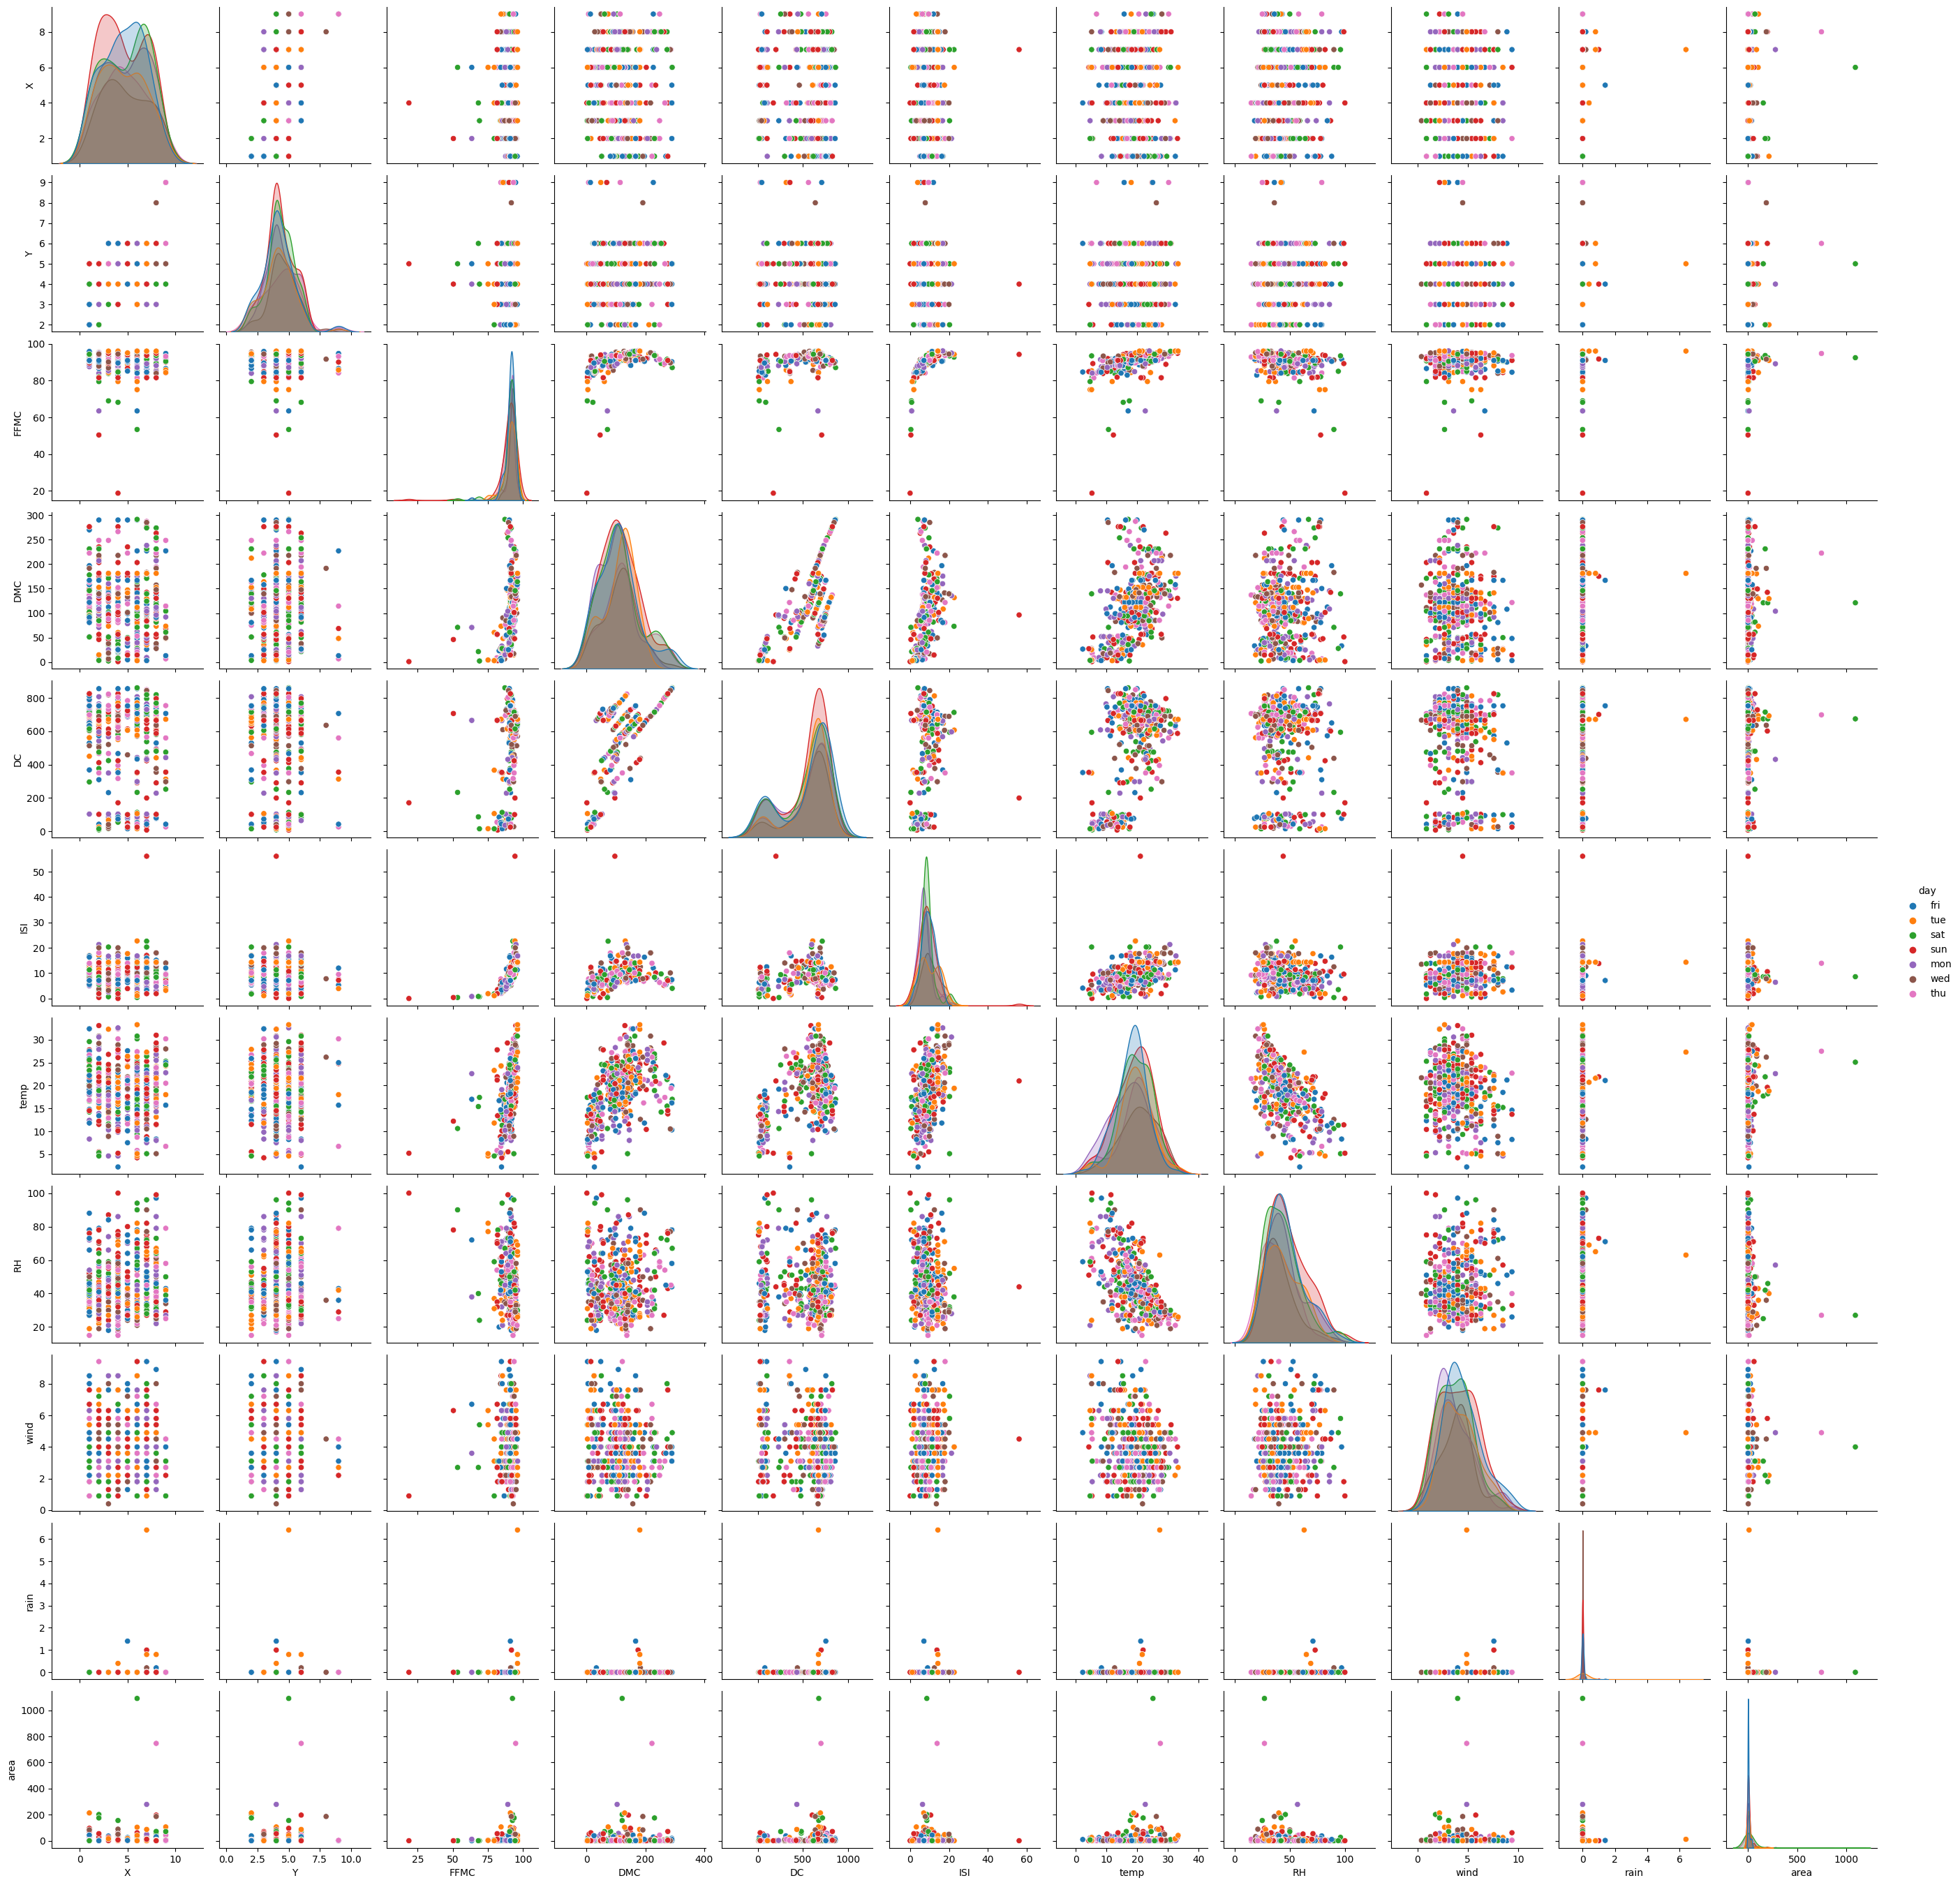

In [ ]:
sns.pairplot(data, hue='day')
plt.show()

# **Distribution using Hist and Kdeplot**

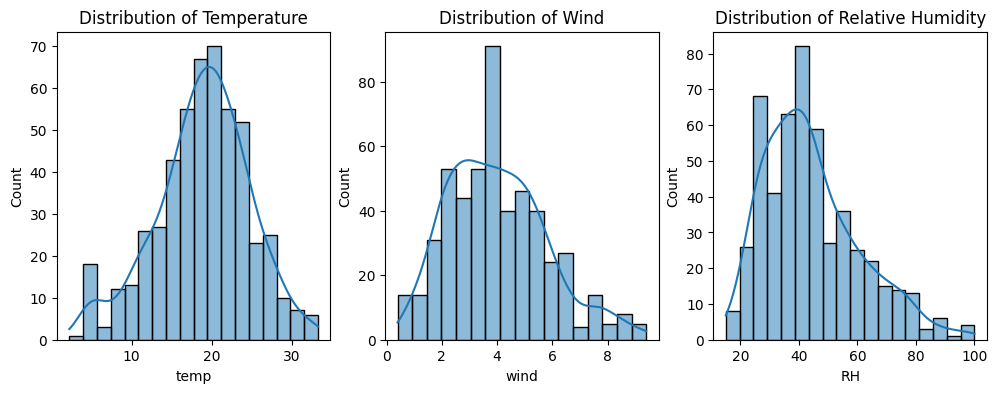

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.histplot(data=data, x='temp', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Temperature')

sns.histplot(data=data, x='wind', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Wind')

sns.histplot(data=data, x='RH', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Relative Humidity')

plt.show()

# **Distribution using Jointplot Histograms**

## **Temperature**

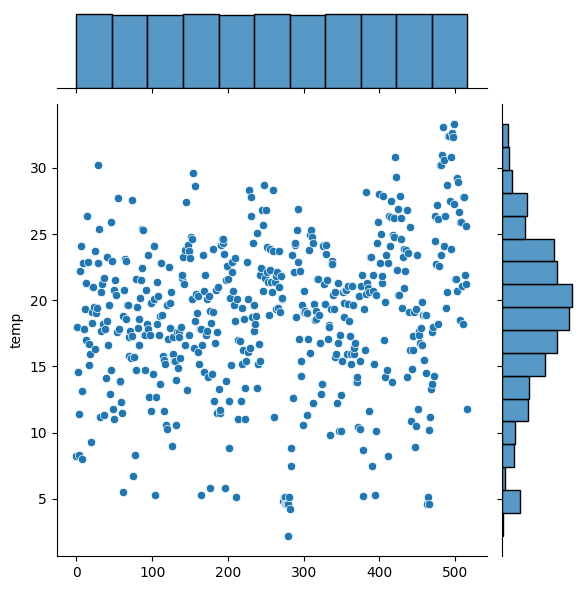

In [ ]:
sns.jointplot(data['temp'])

## **Wind**

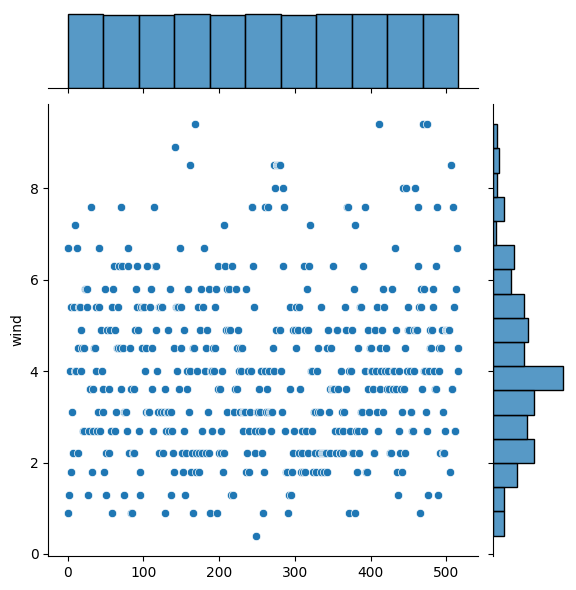

In [ ]:
sns.jointplot(data['wind'])

## **Relative Humidity**

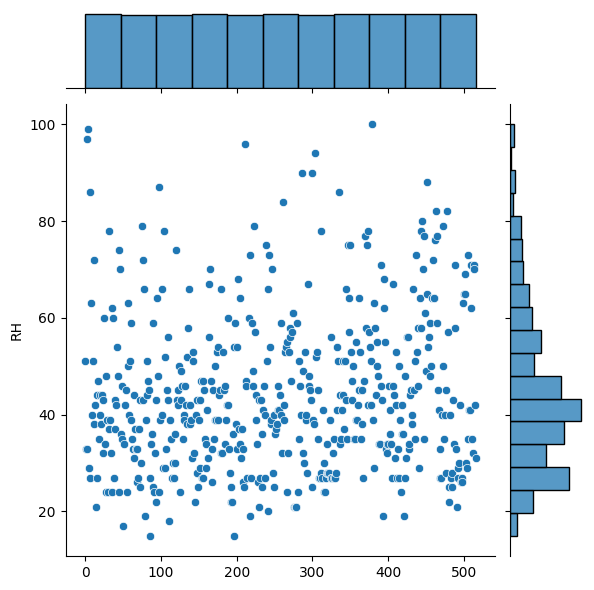

In [ ]:
sns.jointplot(data['RH'])

# **Correlation in the Form of a Heatmap**

<Axes: >

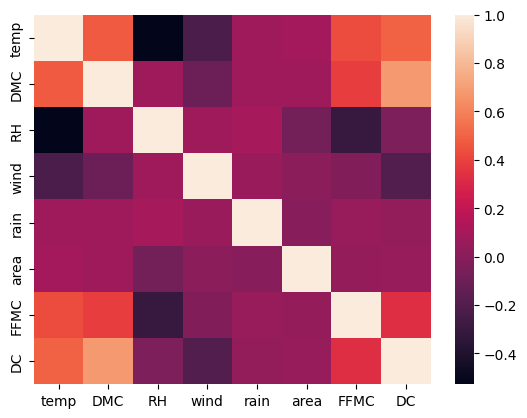

In [ ]:
correlation_data = data[['temp', 'DMC', 'RH', 'wind', 'rain', 'area', 'FFMC','DC']].corr()
sns.heatmap(correlation_data)

<ipython-input-151-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

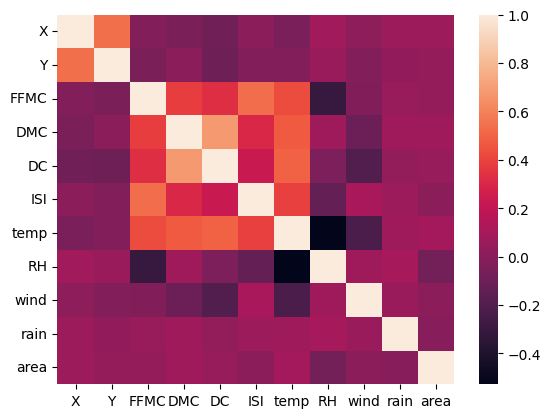

In [ ]:
sns.heatmap(data.corr())

<ipython-input-18-a1410314a60a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


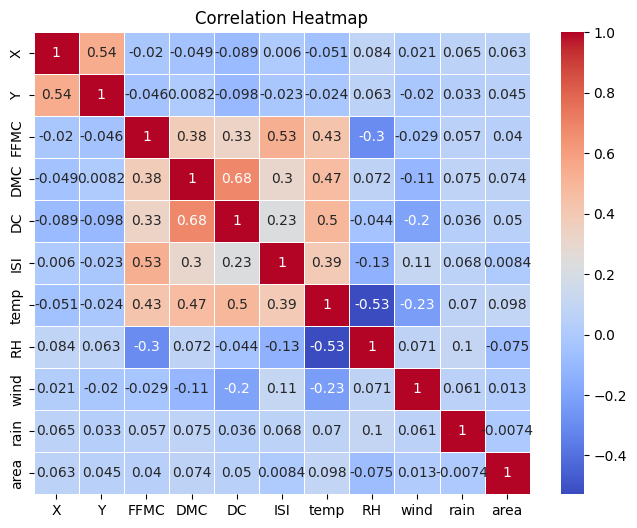

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## **DC Index and DCM Index**

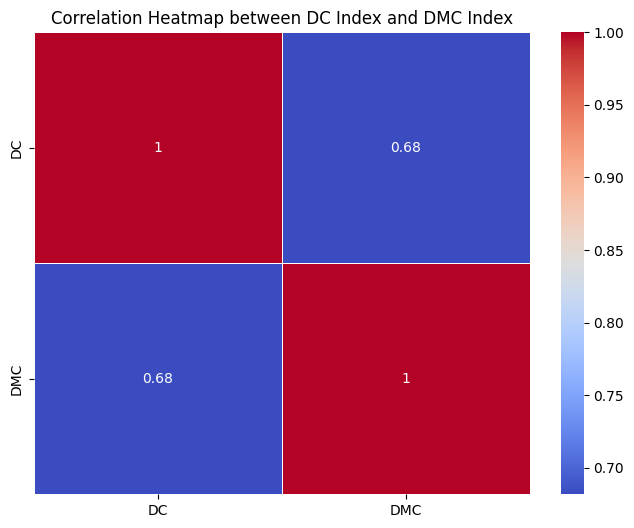

In [ ]:
selected_features = ['DC', 'DMC']
correlation_matrix = data[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap between DC Index and DMC Index")
plt.show()

## **FFMC Index and ISI Index**

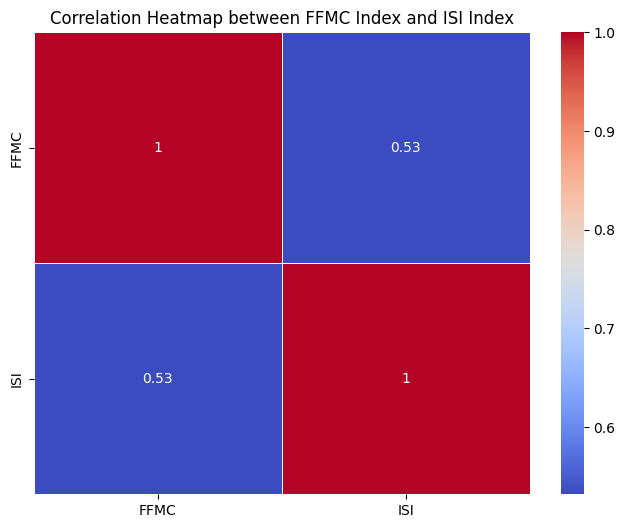

In [ ]:
selected_features = ['FFMC', 'ISI']
correlation_matrix = data[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap between FFMC Index and ISI Index")
plt.show()

## **DC Index and Temperature**

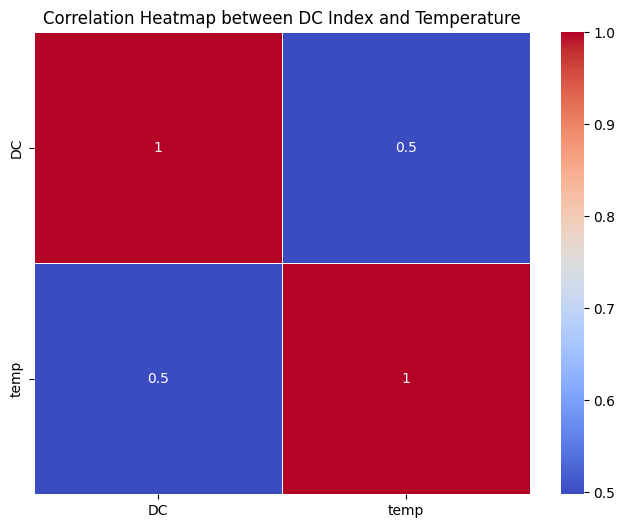

In [ ]:
selected_features = ['DC', 'temp']
correlation_matrix = data[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap between DC Index and Temperature")
plt.show()

# **Box Plot**

In [ ]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [ ]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [ ]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<Axes: xlabel='wind', ylabel='day'>

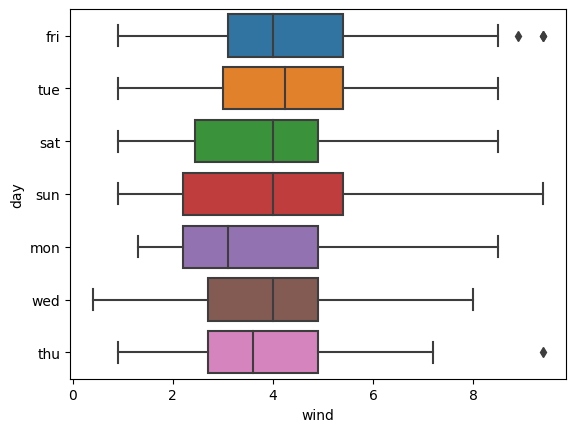

In [ ]:
sns.boxplot(data=data, x='wind', y='day')

<Axes: xlabel='temp', ylabel='month'>

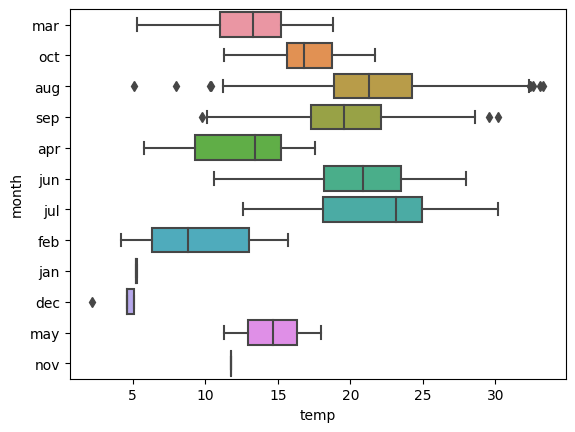

In [ ]:
sns.boxplot(data=data, x='temp', y='month')

<Axes: xlabel='temp', ylabel='day'>

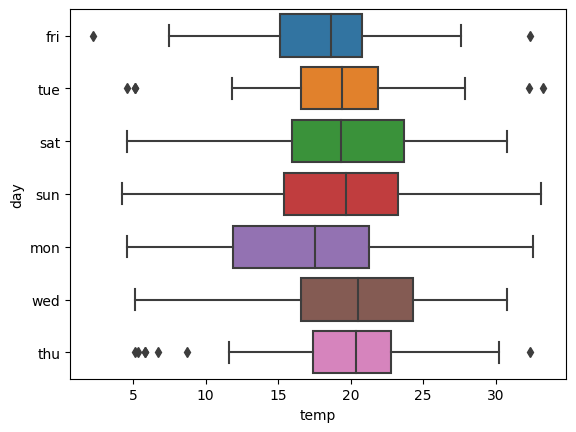

In [ ]:
sns.boxplot(data=data, x='temp', y='day')

<Axes: xlabel='DMC', ylabel='day'>

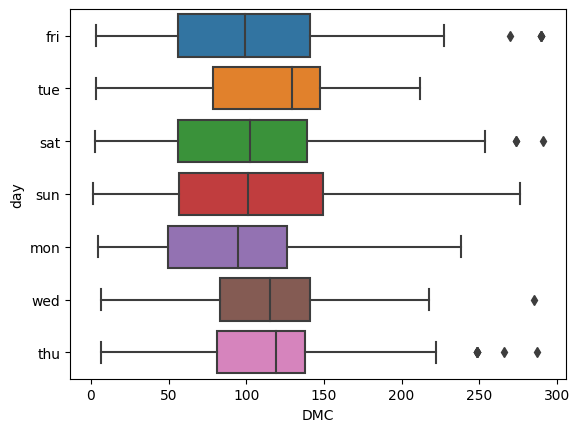

In [ ]:
sns.boxplot(data=data, x='DMC', y='day')

# violinplot, stripplot, swarmplot, pie.

## Violin Plot

<Axes: >

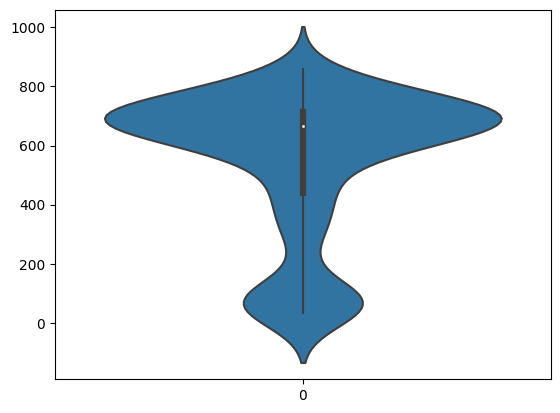

In [ ]:
sns.violinplot(data['DC'])

<Axes: >

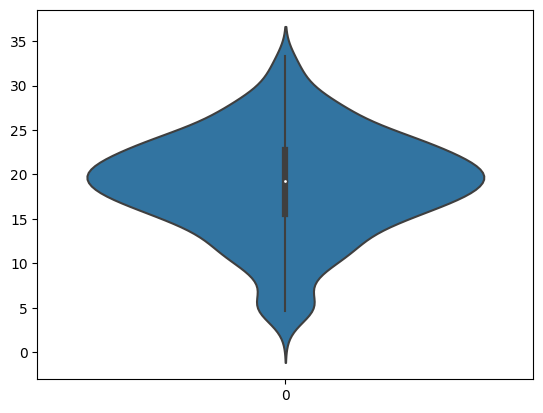

In [ ]:
sns.violinplot(data['temp'])

<Axes: xlabel='temp', ylabel='day'>

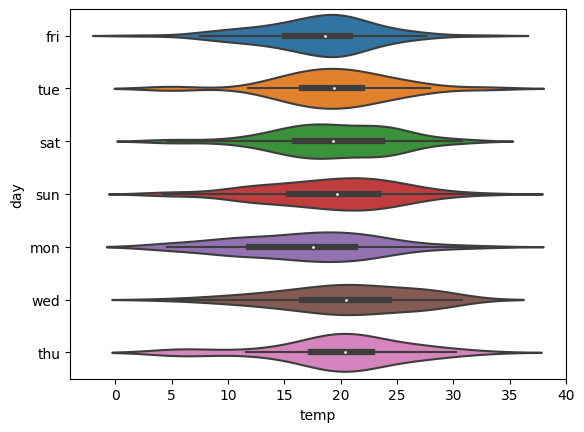

In [ ]:
sns.violinplot(data, x='temp', y='day')

## Strip Plot

<Axes: xlabel='wind'>

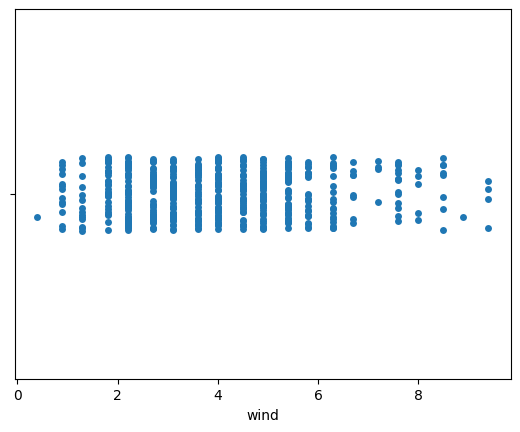

In [ ]:
sns.stripplot(data, x='wind')

<Axes: xlabel='temp', ylabel='day'>

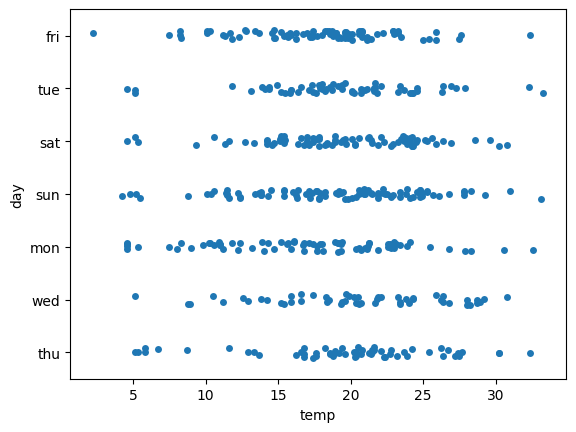

In [ ]:
sns.stripplot(data, x='temp',y='day')

<Axes: xlabel='ISI', ylabel='month'>

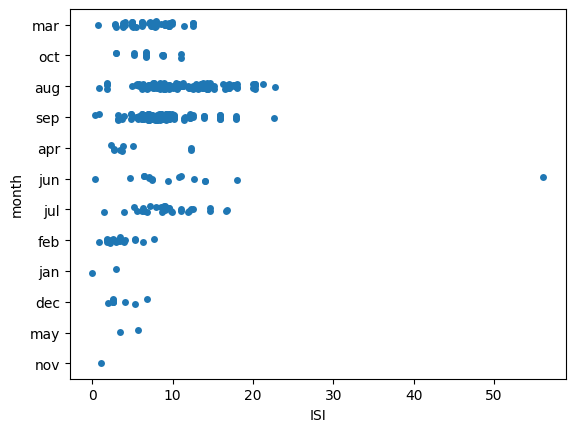

In [ ]:
sns.stripplot(data, x='ISI',y='month')

## Swarm plot

<Axes: xlabel='temp'>

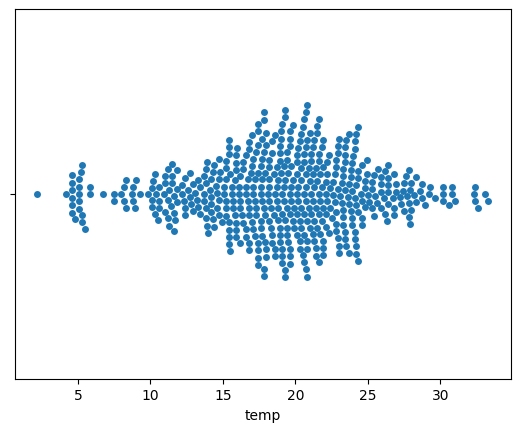

In [ ]:
sns.swarmplot(data,x='temp')

<Axes: xlabel='wind'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


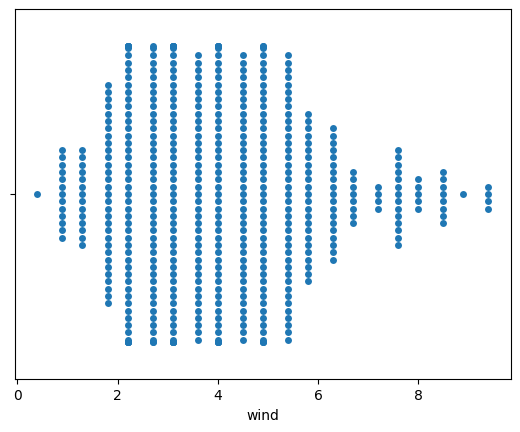

In [ ]:
sns.swarmplot(data,x='wind')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed;

<Axes: xlabel='DC', ylabel='day'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.2% of the points cannot be plac

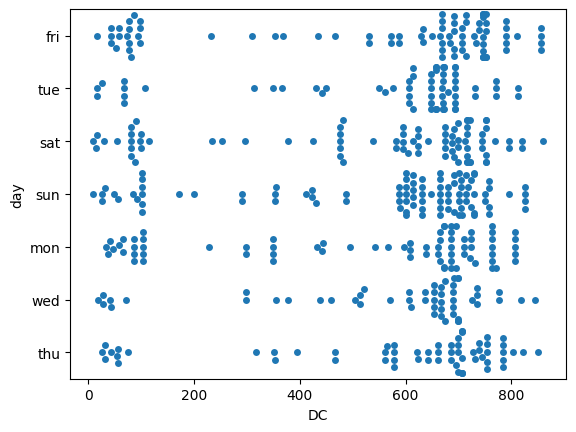

In [ ]:
sns.swarmplot(data,x='DC',y='day')

## Pie

In [ ]:
data_day = data[['day','FFMC','DMC','DC','wind','temp']]
data_day = data_day.groupby('day').sum()
data_day

,FFMC,DMC,DC,wind,temp
day,,,,,
fri,7725.2,9276.9,46374.5,382.0,1525.6
mon,6648.4,6954.3,38169.7,276.6,1254.4
sat,7593.5,9268.7,44363.8,315.7,1625.3
sun,8512.4,10857.7,51983.3,391.7,1811.2
thu,5595.3,7698.8,35567.8,226.4,1202.0
tue,5811.8,7096.0,36265.2,273.4,1244.1
wed,4976.7,6168.6,30560.7,211.3,1103.1


In [ ]:
labelday = data_day.index.tolist()
labelday

['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

([<matplotlib.patches.Wedge at 0x7ba615a99780>,
 [Text(0.9214502724175737, 0.6007739969918634, 'fri'),
  Text(-0.0034105925914010016, 1.0999947126500997, 'mon'),
  Text(-0.8609399838212725, 0.6846768173801617, 'sat'),
  Text(-1.0139845834112828, -0.4264214635829758, 'sun'),
  Text(-0.2591634605060624, -1.069034284173582, 'thu'),
  Text(0.5447565091196385, -0.9556360948456193, 'tue'),
  Text(1.0443009774558514, -0.34559436986842507, 'wed')])

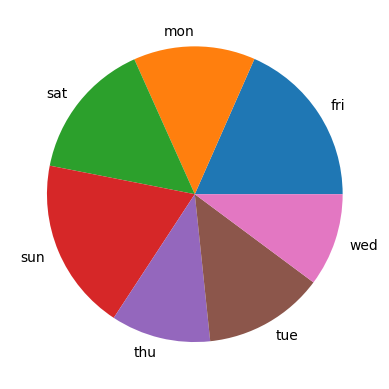

In [ ]:
plt.pie(data_day['wind'], labels=labelday)

([<matplotlib.patches.Wedge at 0x7ba617a925f0>,
 [Text(0.9608559726670739, 0.5354958447924798, 'fri'),
  Text(0.18910699380872587, 1.0836228794615896, 'mon'),
  Text(-0.7223083765825078, 0.829620762227382, 'sat'),
  Text(-1.0661750271173487, -0.2706858170486972, 'sun'),
  Text(-0.3304676564356612, -1.0491859358807294, 'thu'),
  Text(0.532881512317804, -0.9623083153698144, 'tue'),
  Text(1.03773146270646, -0.36484710675721554, 'wed')])

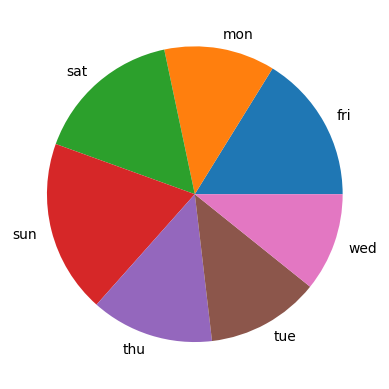

In [ ]:
plt.pie(data_day['DMC'], labels=labelday)

([<matplotlib.patches.Wedge at 0x7ba6135881c0>,
 [Text(0.9557592445576751, 0.5445404176390789, 'fri'),
  Text(0.09815517885198626, 1.095611957247882, 'mon'),
  Text(-0.8374820979343636, 0.7131786141209349, 'sat'),
  Text(-1.023844316135325, -0.40217262004938725, 'sun'),
  Text(-0.27295800911108115, -1.0655955730304603, 'thu'),
  Text(0.5407718534807647, -0.9578965510340761, 'tue'),
  Text(1.0393475886044572, -0.3602174205422334, 'wed')])

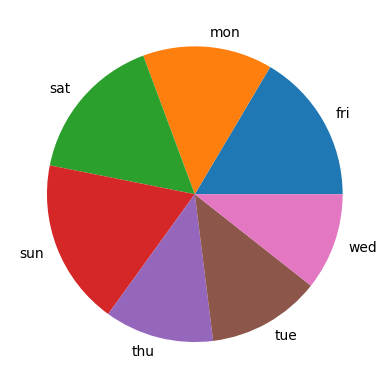

In [ ]:
plt.pie(data_day['FFMC'], labels=labelday)

([<matplotlib.patches.Wedge at 0x7ba61a9e5660>,
 [Text(0.9713803493078759, 0.5161591004511198, 'fri'),
  Text(0.20475006852415178, 1.0807762994437635, 'mon'),
  Text(-0.7424913601233185, 0.8116074051795146, 'sat'),
  Text(-1.059424958817606, -0.2960046564402566, 'sun'),
  Text(-0.3541396046205362, -1.0414341747989695, 'thu'),
  Text(0.49358319910322945, -0.9830440608452004, 'tue'),
  Text(1.0329145219692137, -0.3782692034849131, 'wed')])

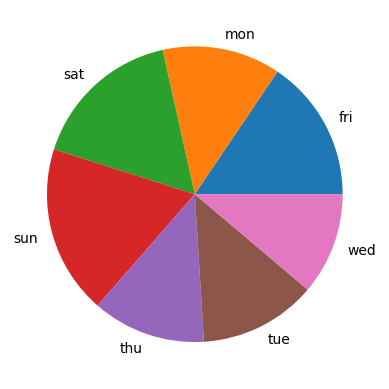

In [ ]:
plt.pie(data_day['temp'], labels=labelday)

([<matplotlib.patches.Wedge at 0x7ba613469a80>,
 [Text(0.9575592656429613, 0.5413688694239008, 'fri'),
  Text(0.12733489048763968, 1.092605063902095, 'mon'),
  Text(-0.7917393740588966, 0.7636417769902499, 'sat'),
  Text(-1.0510383881892364, -0.32452782092229315, 'sun'),
  Text(-0.32684295112552514, -1.050320753531776, 'thu'),
  Text(0.5267578458255634, -0.9656739469723785, 'tue'),
  Text(1.03939030369091, -0.36009414962384195, 'wed')])

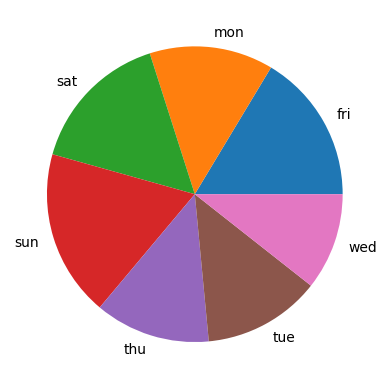

In [ ]:
plt.pie(data_day['DC'], labels=labelday)

In [ ]:
data_month = data[['month','wind','temp','DC']]
data_month = data_month.groupby('month').sum()
data_month

,wind,temp,DC
month,,,
apr,42.0,108.4,437.0
aug,741.6,3940.0,116702.8
dec,68.8,40.7,3161.2
feb,75.1,192.7,1093.4
jan,4.0,10.5,180.7
jul,119.5,707.5,14419.3
jun,65.8,329.2,4828.9
mar,263.4,689.5,4020.1
may,8.9,29.3,187.5


In [ ]:
label_month = data_month.index.tolist()
label_month

['apr',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep']

([<matplotlib.patches.Wedge at 0x7ba61aefe560>,
 [Text(1.0977386138645209, 0.07049777039595526, 'apr'),
  Text(0.33569862914454296, 1.0475239521798414, 'aug'),
  Text(-0.8800231303384007, 0.6599691584228784, 'dec'),
  Text(-1.002715662472911, 0.4522845345924525, 'feb'),
  Text(-1.049906197241732, 0.3281721758367172, 'jan'),
  Text(-1.0928135452456835, 0.12553308459350745, 'jul'),
  Text(-1.084406817263875, -0.18455853995855376, 'jun'),
  Text(-0.8613444563453561, -0.6841679088667658, 'mar'),
  Text(-0.5116072042935411, -0.9737854324824062, 'may'),
  Text(-0.49157646076372186, -0.9840490756171733, 'nov'),
  Text(-0.4051118025911134, -1.0226849111047738, 'oct'),
  Text(0.6537718011855977, -0.8846368927274848, 'sep')])

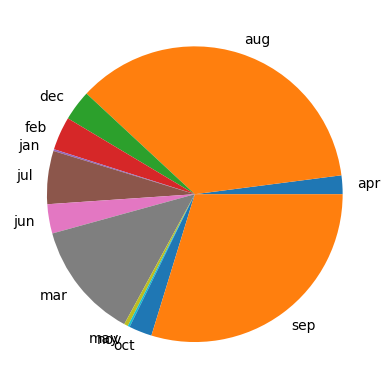

In [ ]:
plt.pie(data_month['wind'], labels=label_month)

([<matplotlib.patches.Wedge at 0x7ba617f861a0>,
 [Text(1.0993206532323478, 0.038653607552261764, 'apr'),
  Text(0.24329749152554703, 1.0727564171876933, 'aug'),
  Text(-0.963677441146431, 0.5304015360323415, 'dec'),
  Text(-1.0010197167135877, 0.45602579614606115, 'feb'),
  Text(-1.0288710838924717, 0.38913274435586936, 'jan'),
  Text(-1.09089047644822, 0.1412726739131665, 'jul'),
  Text(-1.0764385340394553, -0.22645105969058474, 'jun'),
  Text(-0.9448096427530747, -0.5633247189328795, 'mar'),
  Text(-0.7891637364286318, -0.7663032018111378, 'may'),
  Text(-0.7788822245461915, -0.7767512344927276, 'nov'),
  Text(-0.7084784740301907, -0.8414619728994607, 'oct'),
  Text(0.5050869516657602, -0.9771832843724815, 'sep')])

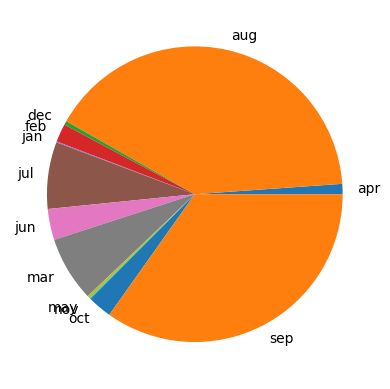

In [ ]:
plt.pie(data_month['temp'], labels=label_month)

([<matplotlib.patches.Wedge at 0x7ba61a167370>,
 [Text(1.0999869383028642, 0.005360556229616813, 'apr'),
  Text(0.2823911229771878, 1.063134635718206, 'aug'),
  Text(-0.9686199474846503, 0.5213208199706143, 'dec'),
  Text(-0.9922550410742312, 0.4747946224029668, 'feb'),
  Text(-0.9989006666435272, 0.460648953302965, 'jan'),
  Text(-1.0603592821426036, 0.29264003959476026, 'jul'),
  Text(-1.0983589345282359, 0.06006372401041033, 'jun'),
  Text(-1.0989329506975778, -0.04843934218293202, 'mar'),
  Text(-1.0954514395379644, -0.099930694054437, 'may'),
  Text(-1.0951176917020031, -0.10352410985503148, 'nov'),
  Text(-1.0759557363544614, -0.22873402328015996, 'oct'),
  Text(0.17714736816686985, -1.0856421187258496, 'sep')])

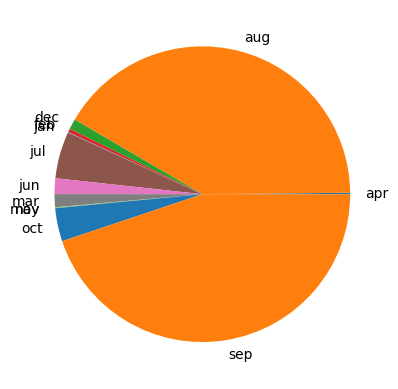

In [ ]:
plt.pie(data_month['DC'], labels=label_month)